## The Sparks Foundation - DS and BA Internship - #GRIPFeb21

**Sharath Vaidyanath**

### Task 1 - Prediction using Supervised ML         

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading the data and viewing the head and tail.
df = pd.read_csv(r"F:\Sparks Foundation\Tasks\Task 1 - Prediction using Supervised ML\dataset.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Let us create a scatter plot to identify the relationship between the two variables

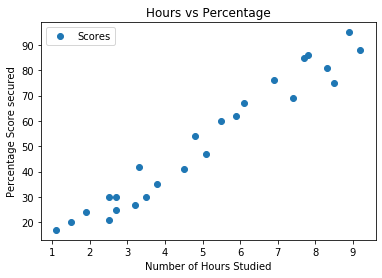

In [4]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score secured')  
plt.show()

From the above graph, we can see a **positive linear relationship** between the two variables

### Preparation of Data

Dividing the data into labels and attributes

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

Now that we have our inputs(attributes) and output(labels), let's split our data into train and test sets.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now that we have train and test data, let's train our algorithm

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

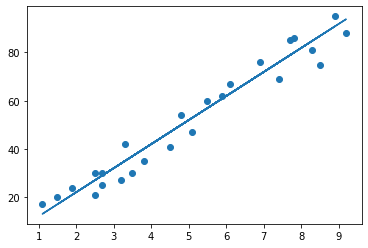

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Let's make the prediction

In [9]:
print(X_test) # Testing the data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [10]:
# Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_new 

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


Now, let's try testing the data.

In [11]:
# Testing with your own data
hours = 11.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 11.25
Predicted Score = 114.22579221332683


### **Evaluating the model**

Now that we have done with our model, let's check the accuracy 

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.864954643694258
